In [1]:
from matplotlib import rc
from lmfit import Model
rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, FixedFormatter, IndexLocator, FixedLocator, NullFormatter)
import pandas as pd
from PIL import Image


In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, LogLocator,FormatStrFormatter, FuncFormatter)

In [4]:
from scipy.fft import fft2, fftshift, rfft2
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import window
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import FancyArrowPatch, ConnectionPatch
from scipy.interpolate import interp2d
from skimage.io import imread


In [5]:
import os
from matplotlib.patches import Ellipse
import skimage.transform
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import ImageGrid

In [6]:
mfm_61_crop = np.loadtxt('20220114_LL_(61_glas)/ds211221_R1_fixed.txt')

mfm_116_crop = np.loadtxt('20220202_LL_(116 SiN)/ds220126_R1_fixed.txt')

<IPython.core.display.Javascript object>


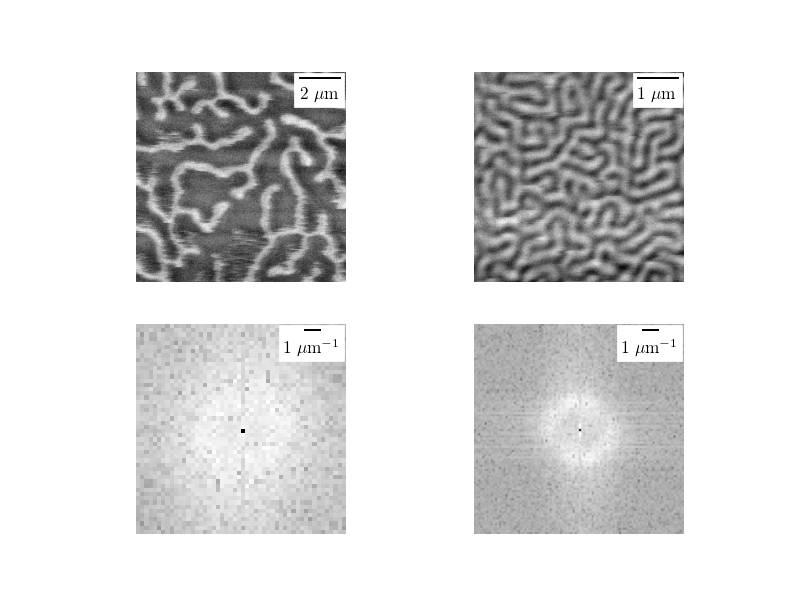

In [7]:
%matplotlib notebook
fig, axes = plt.subplots(2,2)

scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(5./255., 'um', fixed_value=1) # 1 pixel = 0.2 meter
for ax in axes.flatten():
    ax.axis('off')
norm_61 = (mfm_61_crop)/np.max(mfm_61_crop-128.)
norm_116 = mfm_116_crop/np.max(mfm_116_crop)
axes[0][0].imshow(norm_61,cmap='gray')
axes[0][1].imshow(norm_116,cmap='gray')

axes[0][0].add_artist(scalebar_61)
axes[0][1].add_artist(scalebar_116)

scalebar_61_ft = ScaleBar(2*np.pi*2./51., '1/um', dimension='si-length-reciprocal', fixed_value=1) # 1 pixel = 0.2 meter
scalebar_116_ft = ScaleBar(2*np.pi*1./51., '1/um', dimension='si-length-reciprocal', fixed_value=1) # 1 pixel = 0.2 meter

ft_mfm_61 = np.abs(fftshift(fft2(norm_61)))[128-25:128+25,128-25:128+25]
ft_mfm_116 = np.abs(fftshift(fft2(norm_116)))[128-50:128+50,128-50:128+50]
axes[1][0].imshow(np.log(ft_mfm_61),cmap='gray')
axes[1][1].imshow(np.log(ft_mfm_116),cmap='gray')
axes[1][0].add_artist(scalebar_61_ft)
axes[1][1].add_artist(scalebar_116_ft)

In [10]:
def norm_fron_neg_1_to_1(img):
    norm_image = img/np.max(np.abs(img))
    return norm_image

In [11]:
mfm_norm_61  = norm_fron_neg_1_to_1(mfm_61_crop)
mfm_norm_116 = norm_fron_neg_1_to_1(mfm_116_crop)

<IPython.core.display.Javascript object>


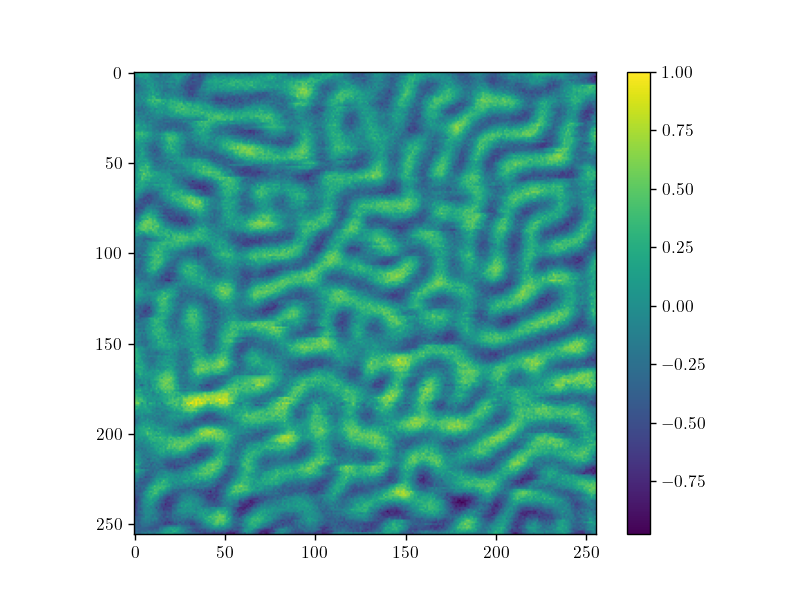

In [12]:
%matplotlib notebook
plt.imshow(mfm_norm_116)
plt.colorbar()

## 61 layers real & fft

In [13]:
imgs = []
scalebars = []

[1.62 1.62]


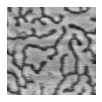

In [14]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter

axes.imshow(mfm_norm_61,cmap='gray')
axes.axis('off')
#axes.add_artist(scalebar_61)
fig.savefig('61_real.pgf', bbox_inches='tight', pad_inches=0.0)

In [15]:
imgs.append(mfm_norm_61)
scalebars.append(scalebar_61)

[1.62 1.62]


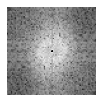

In [16]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

axes.imshow(norm_61,cmap='gray')
axes.axis('off')
scalebar_61_ft = ScaleBar(2*np.pi/10., '1/um', dimension='si-length-reciprocal', fixed_value=5) # 1 pixel = 0.2 meter

ft_mfm_61 = np.abs(fftshift(fft2(mfm_norm_61)))[128-35:128+35,128-35:128+35]
axes.imshow(np.log(ft_mfm_61),cmap='gray', vmin=0, vmax=8)
#axes.add_artist(scalebar_61_ft)
fig.savefig('61_ft.pgf', bbox_inches='tight', pad_inches=0.0)

In [17]:
imgs.append(ft_mfm_61)
scalebars.append(scalebar_61_ft)

## 116 layers real & fft

[1.62 1.62]


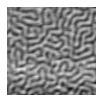

In [18]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

axes.imshow(mfm_norm_116,cmap='gray')
axes.axis('off')
#axes.add_artist(scalebar_116)
plt.savefig('116_real.pgf', bbox_inches='tight', pad_inches=0.0)

In [19]:
imgs.append(mfm_norm_116)
scalebars.append(scalebar_116)

[1.62 1.62]


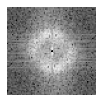

In [20]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((6.48/4, 6.48/4))
print(fig.get_size_inches())
axes = fig.gca()
scalebar_61 = ScaleBar(2./51., 'um', fixed_value=2) # 1 pixel = 0.2 meter
scalebar_116 = ScaleBar(1./51., 'um', fixed_value=1) # 1 pixel = 0.2 meter

norm_61 = mfm_61_crop/np.max(mfm_61_crop)
norm_116 = mfm_116_crop/np.max(mfm_116_crop)
axes.imshow(norm_61,cmap='gray')
axes.axis('off')
scalebar_116_ft = ScaleBar(2*np.pi/5., '1/um', dimension='si-length-reciprocal', fixed_value=10) # 1 pixel = 0.2 meter

ft_mfm_116 = np.abs(fftshift(fft2(mfm_norm_116)))[128-35:128+35,128-35:128+35]
axes.imshow(np.log(ft_mfm_116),cmap='gray', vmin=0.0, vmax=8.)
#axes.add_artist(scalebar_116_ft)
fig.savefig('116_ft.pgf', bbox_inches='tight', pad_inches=0.0)

In [21]:
imgs.append(ft_mfm_116)
scalebars.append(scalebar_116_ft)

In [22]:
from itertools import chain


(256, 256)
(70, 70)
(256, 256)
(70, 70)


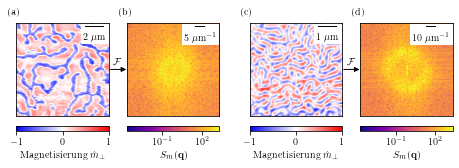

In [23]:
%matplotlib inline
# grob
fig = plt.figure(figsize=(6.48,5.0))
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=(1,1), wspace=0.2, hspace=0.0)
axis1  = subfig_l.subplots(1,2,)
axis2 = subfig_r.subplots(1,2,)

scalebars = [ScaleBar(2./51., 'um', fixed_value=2),
             ScaleBar(2*np.pi /10., '1/um', dimension='si-length-reciprocal', fixed_value=5),
             ScaleBar(1./51., 'um', fixed_value=1),
             ScaleBar(2*np.pi/5., '1/um', dimension='si-length-reciprocal', fixed_value=10)]
grids = chain(axis1, axis2)
c = 0
#print(fig1[0])
letters = ['(a)', '(b)', '(c)', '(d)']
mfm_norm = matplotlib.colors.Normalize(-1, 1)
ft_norm = matplotlib.colors.LogNorm()
norms = [mfm_norm, ft_norm, mfm_norm, ft_norm]
cmaps = ['bwr', 'plasma', 'bwr', 'plasma']
m_label = 'Magnetisierung $\\hat{m}_\\perp$'
ft_label = '$S_m(\\mathbf{q})$'
labels = [m_label, ft_label, m_label, ft_label]
for axis, img, letter, scalebar, norm, cmap, label in zip(grids, imgs, letters, scalebars, norms, cmaps, labels):
    #axis.axis('off')
    axis.set_xticks([])
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.imshow(img, cmap=cmap, rasterized=True, norm=norm, aspect="1")
    axis.add_artist(scalebar)
    print(img.shape)
    fig.colorbar(im, orientation='horizontal', ax=axis, fraction=0.043, pad=0.04, label=label)
    #axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"), label = 'Auslesesignal in ADU')
    c += 1

subfig_l.subplots_adjust(wspace=0.2)
subfig_r.subplots_adjust(wspace=0.2)


xy1 = (1.02, 0.5)
xy2 = (-.01, 0.5)
con = patches.ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB='axes fraction',
                      axesA=axis1[0], axesB=axis1[1], arrowstyle="-|>",
                      connectionstyle="arc3,rad=0", shrinkA=0,shrinkB=0,  fc='k', ec='k', zorder=5)
axis1[1].add_artist(con)
axis1[0].text(1.05, 0.54, '$\\mathcal{F}$', transform=axis1[0].transAxes,)

con1 = patches.ConnectionPatch(xyA=xy1, xyB=xy2, coordsA='axes fraction', coordsB='axes fraction',
                      axesA=axis2[0], axesB=axis2[1], arrowstyle="-|>",
                      connectionstyle="arc3,rad=0", shrinkA=0,shrinkB=0,  fc='k', ec='k', zorder=5)
axis2[1].add_artist(con1)
axis2[0].text(1.05, 0.54, '$\\mathcal{F}$', transform=axis2[0].transAxes,)


fig.subplots_adjust(0.03)

In [24]:
np.save('ft_mfm_116',ft_mfm_116)

In [23]:
fig.savefig('mfm_fourier.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# Skimage transform

In [93]:
ft_mfm_116_fixed = ft_mfm_116.copy()
ft_mfm_116_fixed[:,35] = 0
ft_mfm_116_fixed[35,:] = 0
print('sum ft_mfm_116_fixed: ', ft_mfm_116_fixed.sum(axis=(0,1)))
rad_ft = skimage.transform.warp_polar(ft_mfm_116_fixed)
rad_ft.shape
rad_ft_r = rad_ft / np.arange(1,51)
print(rad_ft_r.sum(axis=(0,1)))

sum ft_mfm_116_fixed:  573844.0261191835
244998.40191104682


<IPython.core.display.Javascript object>


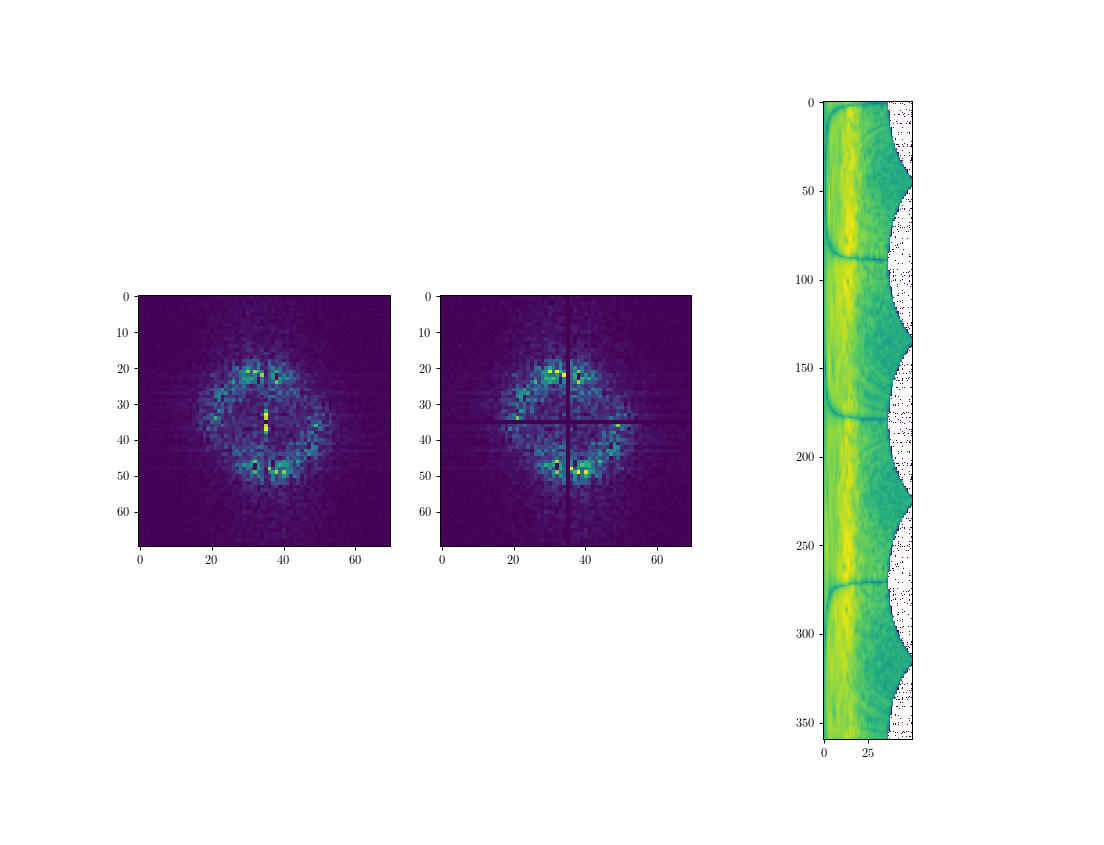

In [96]:
%matplotlib notebook
plt.subplot(133)
plt.imshow(rad_ft, norm=matplotlib.colors.LogNorm())
plt.subplot(132)
plt.imshow(ft_mfm_116_fixed)
plt.subplot(131)
plt.imshow(ft_mfm_116)

<IPython.core.display.Javascript object>


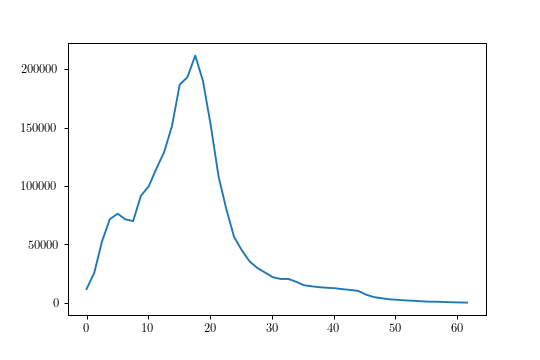

In [95]:
%matplotlib notebook
a = rad_ft.sum(axis=0)
# whole pic = 2*np.pi/5. = 70px
plt.plot(np.arange(0,50)*2*np.pi/5.,a,)

In [78]:
np.save('rad_ft_transform_radial', rad_ft)

# pyFAI transfrom

In [32]:
import pyFAI

In [55]:
x = np.arange(0,20)
y = np.arange(0,20)

x1, x2 = np.meshgrid(x,y)
ones = np.ones_like(xy)

In [56]:
def f(x,y):
    if (x % 4 == 0) and ((y % 4 == 0)):
        return 1
    else:
        return 0

f_vec = np.vectorize(f)

In [77]:
grid = f_vec(x1,x2)
shifted_grid = np.roll(grid, 2)
shifted_grid = np.roll(shifted_grid, 2, axis=0)

[[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 

<IPython.core.display.Javascript object>


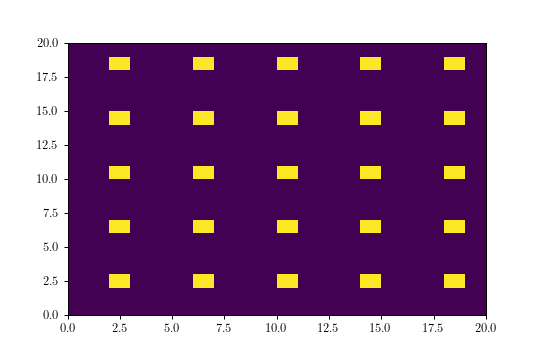

In [78]:
%matplotlib notebook
print(grid)
print(shifted_grid)
#plt.pcolormesh(grid)
plt.pcolormesh(shifted_grid)

[[ 2.50000000e+01-6.32852573e-17j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  2.50000000e+01-6.32852573e-17j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   2.50000000e+01-6.32852573e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  2.50000000e+01+6.32852573e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-1.33226763e-15-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j -1.33226763e-15-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
   0.00000000e+00-0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  -1.3322

<IPython.core.display.Javascript object>


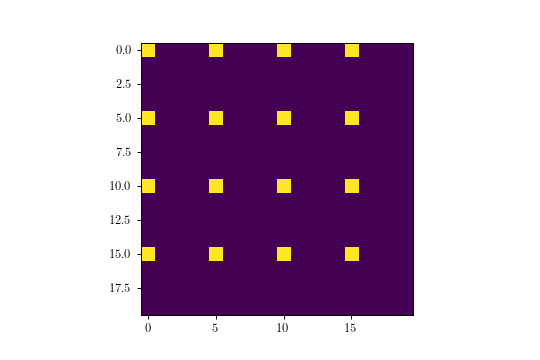

In [90]:
%matplotlib notebook

grid_fft = fftshift(fft2(grid))
grid_shifted_fft = fftshift(fft2(shifted_grid))
print(grid_fft)
print(grid_shifted_fft)
summ = np.conjugate(grid_fft)*grid_shifted_fft + (grid_fft)*np.conjugate(grid_shifted_fft)
plt.imshow(np.abs(summ))